# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from lib_file import lib_path
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import os
for dirname,_,filenames in os.walk("input"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

input\CICIDS2017.csv


# Data Loading

In [2]:
df=pd.read_csv("input/CICIDS2017.csv")

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.shape

(225745, 79)

# Data Preprocessing

In [5]:
for feature in df.columns.tolist():
    print('{:<30} -> {} null values'.format(feature, df[feature].isnull().sum()),'\n')

 Destination Port              -> 0 null values 

 Flow Duration                 -> 0 null values 

 Total Fwd Packets             -> 0 null values 

 Total Backward Packets        -> 0 null values 

Total Length of Fwd Packets    -> 0 null values 

 Total Length of Bwd Packets   -> 0 null values 

 Fwd Packet Length Max         -> 0 null values 

 Fwd Packet Length Min         -> 0 null values 

 Fwd Packet Length Mean        -> 0 null values 

 Fwd Packet Length Std         -> 0 null values 

Bwd Packet Length Max          -> 0 null values 

 Bwd Packet Length Min         -> 0 null values 

 Bwd Packet Length Mean        -> 0 null values 

 Bwd Packet Length Std         -> 0 null values 

Flow Bytes/s                   -> 4 null values 

 Flow Packets/s                -> 0 null values 

 Flow IAT Mean                 -> 0 null values 

 Flow IAT Std                  -> 0 null values 

 Flow IAT Max                  -> 0 null values 

 Flow IAT Min                  -> 0 null values 



In [6]:
for feature in df.columns.tolist():
    print('{:<30} -> {} infinity values'.format(feature, df[feature].isin([np.inf, -np.inf]).sum()),'\n')

 Destination Port              -> 0 infinity values 

 Flow Duration                 -> 0 infinity values 

 Total Fwd Packets             -> 0 infinity values 

 Total Backward Packets        -> 0 infinity values 

Total Length of Fwd Packets    -> 0 infinity values 

 Total Length of Bwd Packets   -> 0 infinity values 

 Fwd Packet Length Max         -> 0 infinity values 

 Fwd Packet Length Min         -> 0 infinity values 

 Fwd Packet Length Mean        -> 0 infinity values 

 Fwd Packet Length Std         -> 0 infinity values 

Bwd Packet Length Max          -> 0 infinity values 

 Bwd Packet Length Min         -> 0 infinity values 

 Bwd Packet Length Mean        -> 0 infinity values 

 Bwd Packet Length Std         -> 0 infinity values 

Flow Bytes/s                   -> 30 infinity values 

 Flow Packets/s                -> 34 infinity values 

 Flow IAT Mean                 -> 0 infinity values 

 Flow IAT Std                  -> 0 infinity values 

 Flow IAT Max             

In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [8]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
class_labels=df[' Label'].unique().tolist()
class_labels.sort()
print(class_labels)

['BENIGN', 'DDoS']


In [10]:
df[' Label'].value_counts()

DDoS      128025
BENIGN     97686
Name:  Label, dtype: int64

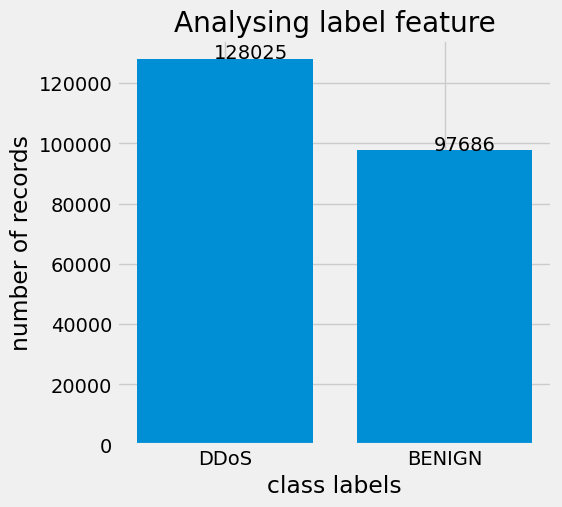

In [11]:
chart_data=list(dict(df[' Label'].value_counts()).values())
chart_labels=list(dict(df[' Label'].value_counts()).keys())
with plt.style.context(style='fivethirtyeight'):
    fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5))
    ax.bar(x=chart_labels,
           height=chart_data)
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+50))
    ax.set_title(label='Analysing label feature')
    ax.set_xlabel(xlabel='class labels')
    ax.set_ylabel(ylabel='number of records')
    plt.show()

In [12]:
df_cols=df.columns.tolist()
df_cols=[str(col).strip() for col in df_cols]
df.columns=df_cols
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN



***Label Encoding***

In [13]:
class_dict={}
for idx,label in enumerate(class_labels):
    class_dict[label]=idx
print(class_dict)

{'BENIGN': 0, 'DDoS': 1}


In [14]:
df['class']=df['Label'].map(class_dict)
df=df.drop(labels='Label',axis=1)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,class
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0


***Feature Selection***

In [15]:
target_feature = 'class'
all_features = df.columns.tolist()
all_features.remove(target_feature)
corr = df[all_features].corrwith(df[target_feature])
sorted_features = corr.abs().sort_values(ascending=False).index.tolist()
selected_features = sorted_features[:20]
filtered_df = df[[target_feature] + selected_features]

In [16]:
filtered_df.head()

,class,Bwd Packet Length Mean,Avg Bwd Segment Size,Bwd Packet Length Max,Bwd Packet Length Std,Destination Port,URG Flag Count,Packet Length Mean,Average Packet Size,Packet Length Std,Min Packet Length,Max Packet Length,Packet Length Variance,min_seg_size_forward,Bwd Packet Length Min,Avg Fwd Segment Size,Fwd Packet Length Mean,Fwd Packet Length Max,Total Length of Fwd Packets,Subflow Fwd Bytes,Bwd IAT Total
0,0,0.0,0.0,0,0.0,54865,0,6.0,9.0,0.0,6,6,0.0,20,0,6.0,6.0,6,12,12,0
1,0,6.0,6.0,6,0.0,55054,1,6.0,9.0,0.0,6,6,0.0,20,6,6.0,6.0,6,6,6,0
2,0,6.0,6.0,6,0.0,55055,1,6.0,9.0,0.0,6,6,0.0,20,6,6.0,6.0,6,6,6,0
3,0,6.0,6.0,6,0.0,46236,1,6.0,9.0,0.0,6,6,0.0,20,6,6.0,6.0,6,6,6,0
4,0,0.0,0.0,0,0.0,54863,0,6.0,9.0,0.0,6,6,0.0,20,0,6.0,6.0,6,12,12,0


***Normalization***

In [17]:
scaler=MinMaxScaler()
scaler=scaler.fit(filtered_df.drop(labels='class',axis=1))
scaled_df=scaler.transform(filtered_df.drop(labels='class',axis=1))
data=pd.DataFrame(data=scaled_df,columns=filtered_df.drop(labels='class',axis=1).columns)
data['class']=filtered_df['class'].values
data.head()

,Bwd Packet Length Mean,Avg Bwd Segment Size,Bwd Packet Length Max,Bwd Packet Length Std,Destination Port,URG Flag Count,Packet Length Mean,Average Packet Size,Packet Length Std,Min Packet Length,Max Packet Length,Packet Length Variance,min_seg_size_forward,Bwd Packet Length Min,Avg Fwd Segment Size,Fwd Packet Length Mean,Fwd Packet Length Max,Total Length of Fwd Packets,Subflow Fwd Bytes,Bwd IAT Total,class
0,0.000000,0.000000,0.000000,0.0,0.837225,0.0,0.003098,0.00356,0.0,0.017804,0.000514,0.0,0.384615,0.00000,0.001552,0.001552,0.000514,0.000066,0.000066,0.0,0
1,0.001034,0.001034,0.000514,0.0,0.840109,1.0,0.003098,0.00356,0.0,0.017804,0.000514,0.0,0.384615,0.00411,0.001552,0.001552,0.000514,0.000033,0.000033,0.0,0
2,0.001034,0.001034,0.000514,0.0,0.840124,1.0,0.003098,0.00356,0.0,0.017804,0.000514,0.0,0.384615,0.00411,0.001552,0.001552,0.000514,0.000033,0.000033,0.0,0
3,0.001034,0.001034,0.000514,0.0,0.705548,1.0,0.003098,0.00356,0.0,0.017804,0.000514,0.0,0.384615,0.00411,0.001552,0.001552,0.000514,0.000033,0.000033,0.0,0
4,0.000000,0.000000,0.000000,0.0,0.837194,0.0,0.003098,0.00356,0.0,0.017804,0.000514,0.0,0.384615,0.00000,0.001552,0.001552,0.000514,0.000066,0.000066,0.0,0


In [18]:
with open(file='models/Scaler.pkl',mode='wb') as file:
    pickle.dump(obj=scaler,file=file)

In [19]:
imp_cols=data.columns.tolist()
with open(file='models/Important_Columns.pkl',mode='wb') as file:
    pickle.dump(obj=imp_cols,file=file)

In [20]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [21]:
X.head()

,Bwd Packet Length Mean,Avg Bwd Segment Size,Bwd Packet Length Max,Bwd Packet Length Std,Destination Port,URG Flag Count,Packet Length Mean,Average Packet Size,Packet Length Std,Min Packet Length,Max Packet Length,Packet Length Variance,min_seg_size_forward,Bwd Packet Length Min,Avg Fwd Segment Size,Fwd Packet Length Mean,Fwd Packet Length Max,Total Length of Fwd Packets,Subflow Fwd Bytes,Bwd IAT Total
0,0.000000,0.000000,0.000000,0.0,0.837225,0.0,0.003098,0.00356,0.0,0.017804,0.000514,0.0,0.384615,0.00000,0.001552,0.001552,0.000514,0.000066,0.000066,0.0
1,0.001034,0.001034,0.000514,0.0,0.840109,1.0,0.003098,0.00356,0.0,0.017804,0.000514,0.0,0.384615,0.00411,0.001552,0.001552,0.000514,0.000033,0.000033,0.0
2,0.001034,0.001034,0.000514,0.0,0.840124,1.0,0.003098,0.00356,0.0,0.017804,0.000514,0.0,0.384615,0.00411,0.001552,0.001552,0.000514,0.000033,0.000033,0.0
3,0.001034,0.001034,0.000514,0.0,0.705548,1.0,0.003098,0.00356,0.0,0.017804,0.000514,0.0,0.384615,0.00411,0.001552,0.001552,0.000514,0.000033,0.000033,0.0
4,0.000000,0.000000,0.000000,0.0,0.837194,0.0,0.003098,0.00356,0.0,0.017804,0.000514,0.0,0.384615,0.00000,0.001552,0.001552,0.000514,0.000066,0.000066,0.0


In [22]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


***Data Oversampling***

In [23]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X.values, y.values.ravel())

data=pd.DataFrame(data=X_smote,columns=X.columns)
data['class']=y_smote
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,Bwd Packet Length Mean,Avg Bwd Segment Size,Bwd Packet Length Max,Bwd Packet Length Std,Destination Port,URG Flag Count,Packet Length Mean,Average Packet Size,Packet Length Std,Min Packet Length,Max Packet Length,Packet Length Variance,min_seg_size_forward,Bwd Packet Length Min,Avg Fwd Segment Size,Fwd Packet Length Mean,Fwd Packet Length Max,Total Length of Fwd Packets,Subflow Fwd Bytes,Bwd IAT Total,class
0,0.333506,0.333506,0.375000,0.265703,0.001221,0.0,0.600620,0.511296,0.402400,0.000000,0.375000,0.161834,0.384615,0.000000,0.002241,0.002241,0.001712,0.000142,0.000142,9.723667e-04,1
1,0.017585,0.017585,0.008733,0.000000,0.000809,0.0,0.030978,0.029668,0.008103,0.094955,0.008733,0.000066,0.615385,0.069863,0.008275,0.008275,0.002740,0.000350,0.000350,4.083333e-07,0
2,0.047204,0.047204,0.023442,0.000000,0.000809,0.0,0.057724,0.051596,0.023390,0.139466,0.023442,0.000547,0.384615,0.187539,0.012154,0.012154,0.004024,0.001027,0.001027,2.290022e-07,0
3,0.000000,0.000000,0.000000,0.000000,0.001221,0.0,0.003098,0.002848,0.000000,0.017804,0.000514,0.000000,0.384615,0.000000,0.001552,0.001552,0.000514,0.000164,0.000164,0.000000e+00,1
4,0.103526,0.103526,0.122260,0.081215,0.006760,0.0,0.136890,0.112370,0.103817,0.000000,0.122260,0.010772,0.384615,0.000000,0.012089,0.012089,0.016524,0.002044,0.002044,6.111342e-03,0


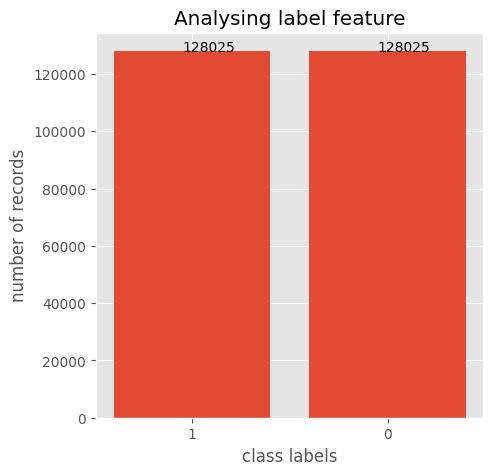

In [24]:
chart_data=list(dict(data['class'].value_counts()).values())
chart_labels=list(dict(data['class'].value_counts()).keys())
chart_labels=[str(item) for item in chart_labels]
with plt.style.context(style='ggplot'):
    fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5))
    ax.bar(x=chart_labels,
           height=chart_data)
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+50))
    ax.set_title(label='Analysing label feature')
    ax.set_xlabel(xlabel='class labels')
    ax.set_ylabel(ylabel='number of records')
    plt.show()

In [25]:
data.shape

(256050, 21)

# Data Splitting

In [26]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [27]:
X.head()

,Bwd Packet Length Mean,Avg Bwd Segment Size,Bwd Packet Length Max,Bwd Packet Length Std,Destination Port,URG Flag Count,Packet Length Mean,Average Packet Size,Packet Length Std,Min Packet Length,Max Packet Length,Packet Length Variance,min_seg_size_forward,Bwd Packet Length Min,Avg Fwd Segment Size,Fwd Packet Length Mean,Fwd Packet Length Max,Total Length of Fwd Packets,Subflow Fwd Bytes,Bwd IAT Total
0,0.333506,0.333506,0.375000,0.265703,0.001221,0.0,0.600620,0.511296,0.402400,0.000000,0.375000,0.161834,0.384615,0.000000,0.002241,0.002241,0.001712,0.000142,0.000142,9.723667e-04
1,0.017585,0.017585,0.008733,0.000000,0.000809,0.0,0.030978,0.029668,0.008103,0.094955,0.008733,0.000066,0.615385,0.069863,0.008275,0.008275,0.002740,0.000350,0.000350,4.083333e-07
2,0.047204,0.047204,0.023442,0.000000,0.000809,0.0,0.057724,0.051596,0.023390,0.139466,0.023442,0.000547,0.384615,0.187539,0.012154,0.012154,0.004024,0.001027,0.001027,2.290022e-07
3,0.000000,0.000000,0.000000,0.000000,0.001221,0.0,0.003098,0.002848,0.000000,0.017804,0.000514,0.000000,0.384615,0.000000,0.001552,0.001552,0.000514,0.000164,0.000164,0.000000e+00
4,0.103526,0.103526,0.122260,0.081215,0.006760,0.0,0.136890,0.112370,0.103817,0.000000,0.122260,0.010772,0.384615,0.000000,0.012089,0.012089,0.016524,0.002044,0.002044,6.111342e-03


In [28]:
y.head()

,class
0,1
1,0
2,0
3,1
4,0


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(204840, 20) (51210, 20) (204840, 1) (51210, 1)


In [30]:
X_train.to_csv("splitted_data/X_train.csv",index=False)
X_test.to_csv("splitted_data/X_test.csv",index=False)
y_train.to_csv("splitted_data/y_train.csv",index=False)
y_test.to_csv("splitted_data/y_test.csv",index=False)

---